# **Anaylsis of the World Happiness Score (2024)**

In [10]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Roadmap:**
- Loading Data and getting first insights
- Data Cleaning
- Data Visualization
- Implementing a DSUC
- Modelling (→ Implementing Decsision Tree, Random Forest, Pipeline, Cross Validation and XGBOOST)
- Analysis and Evaluation

# Data Loading and First Observations


---
**Small Legend of the DataFrame columns:** \
Life Ladder = scale from 1 - 10 \
Log GDP = just the normal GDP per Person \
Life expectancy = in years \
Rest of the columns = How many percent answered with yes

---

In [11]:
# importing and encoding the data
happiness_import = 'World-happiness-report-updated_2024 (1).csv'
happy_data = pd.read_csv(happiness_import, encoding='latin1')

#checking the first few rows
happy_data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [12]:
# checking the last few rows
happy_data.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191
2362,Zimbabwe,2023,3.572,7.679,0.694,55.000,0.735,-0.069,0.757,0.610,0.179


In [13]:
#checking for missing values & Dtypes
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [14]:
#first deeper isights into the data
happy_data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


# Observations and Questions
**Observations:**
*   structured as panel data, entries for each country recorded across multiple years
*   Life Ladder column → Target value which will be predicted by the ML model
*   Most feature columns are floats (ranging from value -1 to 1), derived from survey responses
*   NaN's are present in most feature columns, except 'Country name' and 'year'
*   the dataset spans the time period from 2005 to 2023
*   The Life Ladder scores range up to approximately 8 (out of a possible 10), with the mean score being around 5.5, which is slightly above the midpoint of the scale
* Very shocking: lowest life expectancy is 6.7 - significant outlier and biologically implausible
*    Generosity has a very low mean but there are really big gaps, even negative values
*   Many Countries have or had to deal with corruption
*   Only 27% of people had negative Feelings the day before

---
**Questions:**
* Life expectation correlation with Happiness?
* what is the impact to the Life Ladder due to corruption?
* Why is there such a low value for life expectancy? Missing Value? Mistake data?
*  GPD Correlation with Happiness?
*  Positive/Negative Affect correlation with happiness?
*  Generosity - are rich countries less generous? Corellation with Happiness Score?
<br>

***The Questions will be answered by Visualization and Different Data Cleaning Techniques.***

# Extreme values and possible outliers


In [15]:
# @title Checking Extreme Values

def find_extreme(dataframe,column,mode):
  """
  Finds the exreme values in a specified column in the DataFrame.

  Arguments:
    dataframe: has to be happy_data
    column: the name of the column to find the extreme value
    mode: min or max

  Returns:
  The extreme value of the column in happy_data
  """
  if mode == max:
    row_index = dataframe[column].idxmax()
  elif mode == min:
    row_index = dataframe[column].idxmin()
  else:
    # handle invalid inputs
    return  "Invalid mode. Please use 'min' or 'max'"

  return dataframe.loc[[row_index]]

  # loop the function to get all extrene rows
columns_to_analyze = ['Life Ladder', 'Log GDP per capita','Healthy life expectancy at birth','Generosity','Perceptions of corruption']
extremes_list = [] # this is a list where the columns are stored to create a clearly arranged DataFrame with all extremes
for col in columns_to_analyze:
  extremes_list.append(find_extreme(happy_data,col,max))
  extremes_list.append(find_extreme(happy_data,col,min))

# create a new index fpr the DataFrame to label the values
extremes_index = []
for col in columns_to_analyze:
  extremes_index.append(f'Max {col}')
  extremes_index.append(f'Min {col}')

# build a new dataframe from the created list of Data
extremes_df = pd.concat(extremes_list)
extremes_df.index = extremes_index

extremes_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Max Life Ladder,Denmark,2005,8.019,10.849,0.972,68.300,0.971,NaN,0.237,0.777,0.154
Min Life Ladder,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
Max Log GDP per capita,Ireland,2023,6.817,11.676,0.921,71.500,0.903,0.182,0.373,0.742,0.245
Min Log GDP per capita,Venezuela,2019,5.081,5.527,0.888,64.400,0.626,0.124,0.839,0.730,0.351
Max Healthy life expectancy at birth,Japan,2023,5.910,10.654,0.842,74.600,0.777,-0.222,0.594,0.638,0.178
Min Healthy life expectancy at birth,Haiti,2006,3.754,7.976,0.694,6.720,0.449,0.355,0.854,0.583,0.332
Max Generosity,Myanmar,2014,4.786,8.205,0.774,59.120,0.870,0.700,0.592,0.713,0.112
Min Generosity,Greece,2018,5.409,10.280,0.794,70.775,0.564,-0.340,0.860,0.564,0.255
Max Perceptions of corruption,Hungary,2010,4.725,10.105,0.896,65.800,0.514,-0.151,0.983,0.574,0.235
Min Perceptions of corruption,Singapore,2009,6.145,11.149,0.866,72.120,0.776,-0.081,0.035,0.450,0.208


The Haiti Problem
---
**Outlier:**

Life Expectancy at birth for Haiti is not 6 years. → real value is 60.7 years (WHO 2006) - there were chaos and political issues (eg. high corruption)  → typo or wrong data

---

we need to change the life expectancy to 60.7 because the wrong data destroys reliability:




In [16]:
# @title Correcting Outlier Haiti 2006 (6 years → 60.7 years)
# locating the row with incorrect value
haiti_2006 = (happy_data['Country name'] == 'Haiti') & (happy_data['year'] == 2006)

# selecting and changing the faulty row
happy_data.loc[haiti_2006, 'Healthy life expectancy at birth'] = 60.700

#checking if everything went correct
happy_data[haiti_2006]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
818,Haiti,2006,3.754,7.976,0.694,60.7,0.449,0.355,0.854,0.583,0.332


In [17]:
# @title Creating a new DataFrame for extreme values

# repeat the same code from above
columns_to_analyze = ['Life Ladder', 'Log GDP per capita','Healthy life expectancy at birth','Generosity','Perceptions of corruption']
extremes_list = [] # this is a list where the columns are stored to create a clearly arranged DataFrame with all extremes
for col in columns_to_analyze:
  extremes_list.append(find_extreme(happy_data,col,max))
  extremes_list.append(find_extreme(happy_data,col,min))

# create a new index fpr the DataFrame to label the values
extremes_index = []
for col in columns_to_analyze:
  extremes_index.append(f'Max {col}')
  extremes_index.append(f'Min {col}')

# build a new dataframe from the created list of Data
extremes_df = pd.concat(extremes_list)
extremes_df.index = extremes_index

extremes_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Max Life Ladder,Denmark,2005,8.019,10.849,0.972,68.300,0.971,NaN,0.237,0.777,0.154
Min Life Ladder,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
Max Log GDP per capita,Ireland,2023,6.817,11.676,0.921,71.500,0.903,0.182,0.373,0.742,0.245
Min Log GDP per capita,Venezuela,2019,5.081,5.527,0.888,64.400,0.626,0.124,0.839,0.730,0.351
Max Healthy life expectancy at birth,Japan,2023,5.910,10.654,0.842,74.600,0.777,-0.222,0.594,0.638,0.178
Min Healthy life expectancy at birth,Haiti,2008,3.846,8.016,0.679,17.360,0.465,0.213,0.812,0.573,0.256
Max Generosity,Myanmar,2014,4.786,8.205,0.774,59.120,0.870,0.700,0.592,0.713,0.112
Min Generosity,Greece,2018,5.409,10.280,0.794,70.775,0.564,-0.340,0.860,0.564,0.255
Max Perceptions of corruption,Hungary,2010,4.725,10.105,0.896,65.800,0.514,-0.151,0.983,0.574,0.235
Min Perceptions of corruption,Singapore,2009,6.145,11.149,0.866,72.120,0.776,-0.081,0.035,0.450,0.208


Another Outlier for Haiti 2008

→ 17.360 years doesn't make sense for a whole population, even regarding to the situation.

→ Research showed that WHO calculated 61.5 years

So we are changing again

In [18]:
# @title Correcting Haiti Outlier 2008 (17.36 years → 61.5 years)
# Just doing the same as above

haiti_2008 = (happy_data['Country name'] == 'Haiti') & (happy_data['year'] == 2008)

happy_data.loc[haiti_2008, 'Healthy life expectancy at birth'] = 61.500

happy_data[haiti_2008]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
819,Haiti,2008,3.846,8.016,0.679,61.5,0.465,0.213,0.812,0.573,0.256


Data Frame for extreme Values (updated) with Visualization of the extremes
---



In [19]:
# @title Creating a new DataFrame for extreme values

# repeat the same code from above
columns_to_analyze = ['Life Ladder', 'Log GDP per capita','Healthy life expectancy at birth','Generosity','Perceptions of corruption']
extremes_list = [] # this is a list where the columns are stored to create a clearly arranged DataFrame with all extremes
for col in columns_to_analyze:
  extremes_list.append(find_extreme(happy_data,col,max))
  extremes_list.append(find_extreme(happy_data,col,min))

# create a new index fpr the DataFrame to label the values
extremes_index = []
for col in columns_to_analyze:
  extremes_index.append(f'Max {col}')
  extremes_index.append(f'Min {col}')

# build a new dataframe from the created list of Data
extremes_df = pd.concat(extremes_list)
extremes_df.index = extremes_index

extremes_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Max Life Ladder,Denmark,2005,8.019,10.849,0.972,68.300,0.971,NaN,0.237,0.777,0.154
Min Life Ladder,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
Max Log GDP per capita,Ireland,2023,6.817,11.676,0.921,71.500,0.903,0.182,0.373,0.742,0.245
Min Log GDP per capita,Venezuela,2019,5.081,5.527,0.888,64.400,0.626,0.124,0.839,0.730,0.351
Max Healthy life expectancy at birth,Japan,2023,5.910,10.654,0.842,74.600,0.777,-0.222,0.594,0.638,0.178
Min Healthy life expectancy at birth,Haiti,2010,3.766,7.987,0.554,28.000,0.373,0.167,0.848,0.495,0.293
Max Generosity,Myanmar,2014,4.786,8.205,0.774,59.120,0.870,0.700,0.592,0.713,0.112
Min Generosity,Greece,2018,5.409,10.280,0.794,70.775,0.564,-0.340,0.860,0.564,0.255
Max Perceptions of corruption,Hungary,2010,4.725,10.105,0.896,65.800,0.514,-0.151,0.983,0.574,0.235
Min Perceptions of corruption,Singapore,2009,6.145,11.149,0.866,72.120,0.776,-0.081,0.035,0.450,0.208


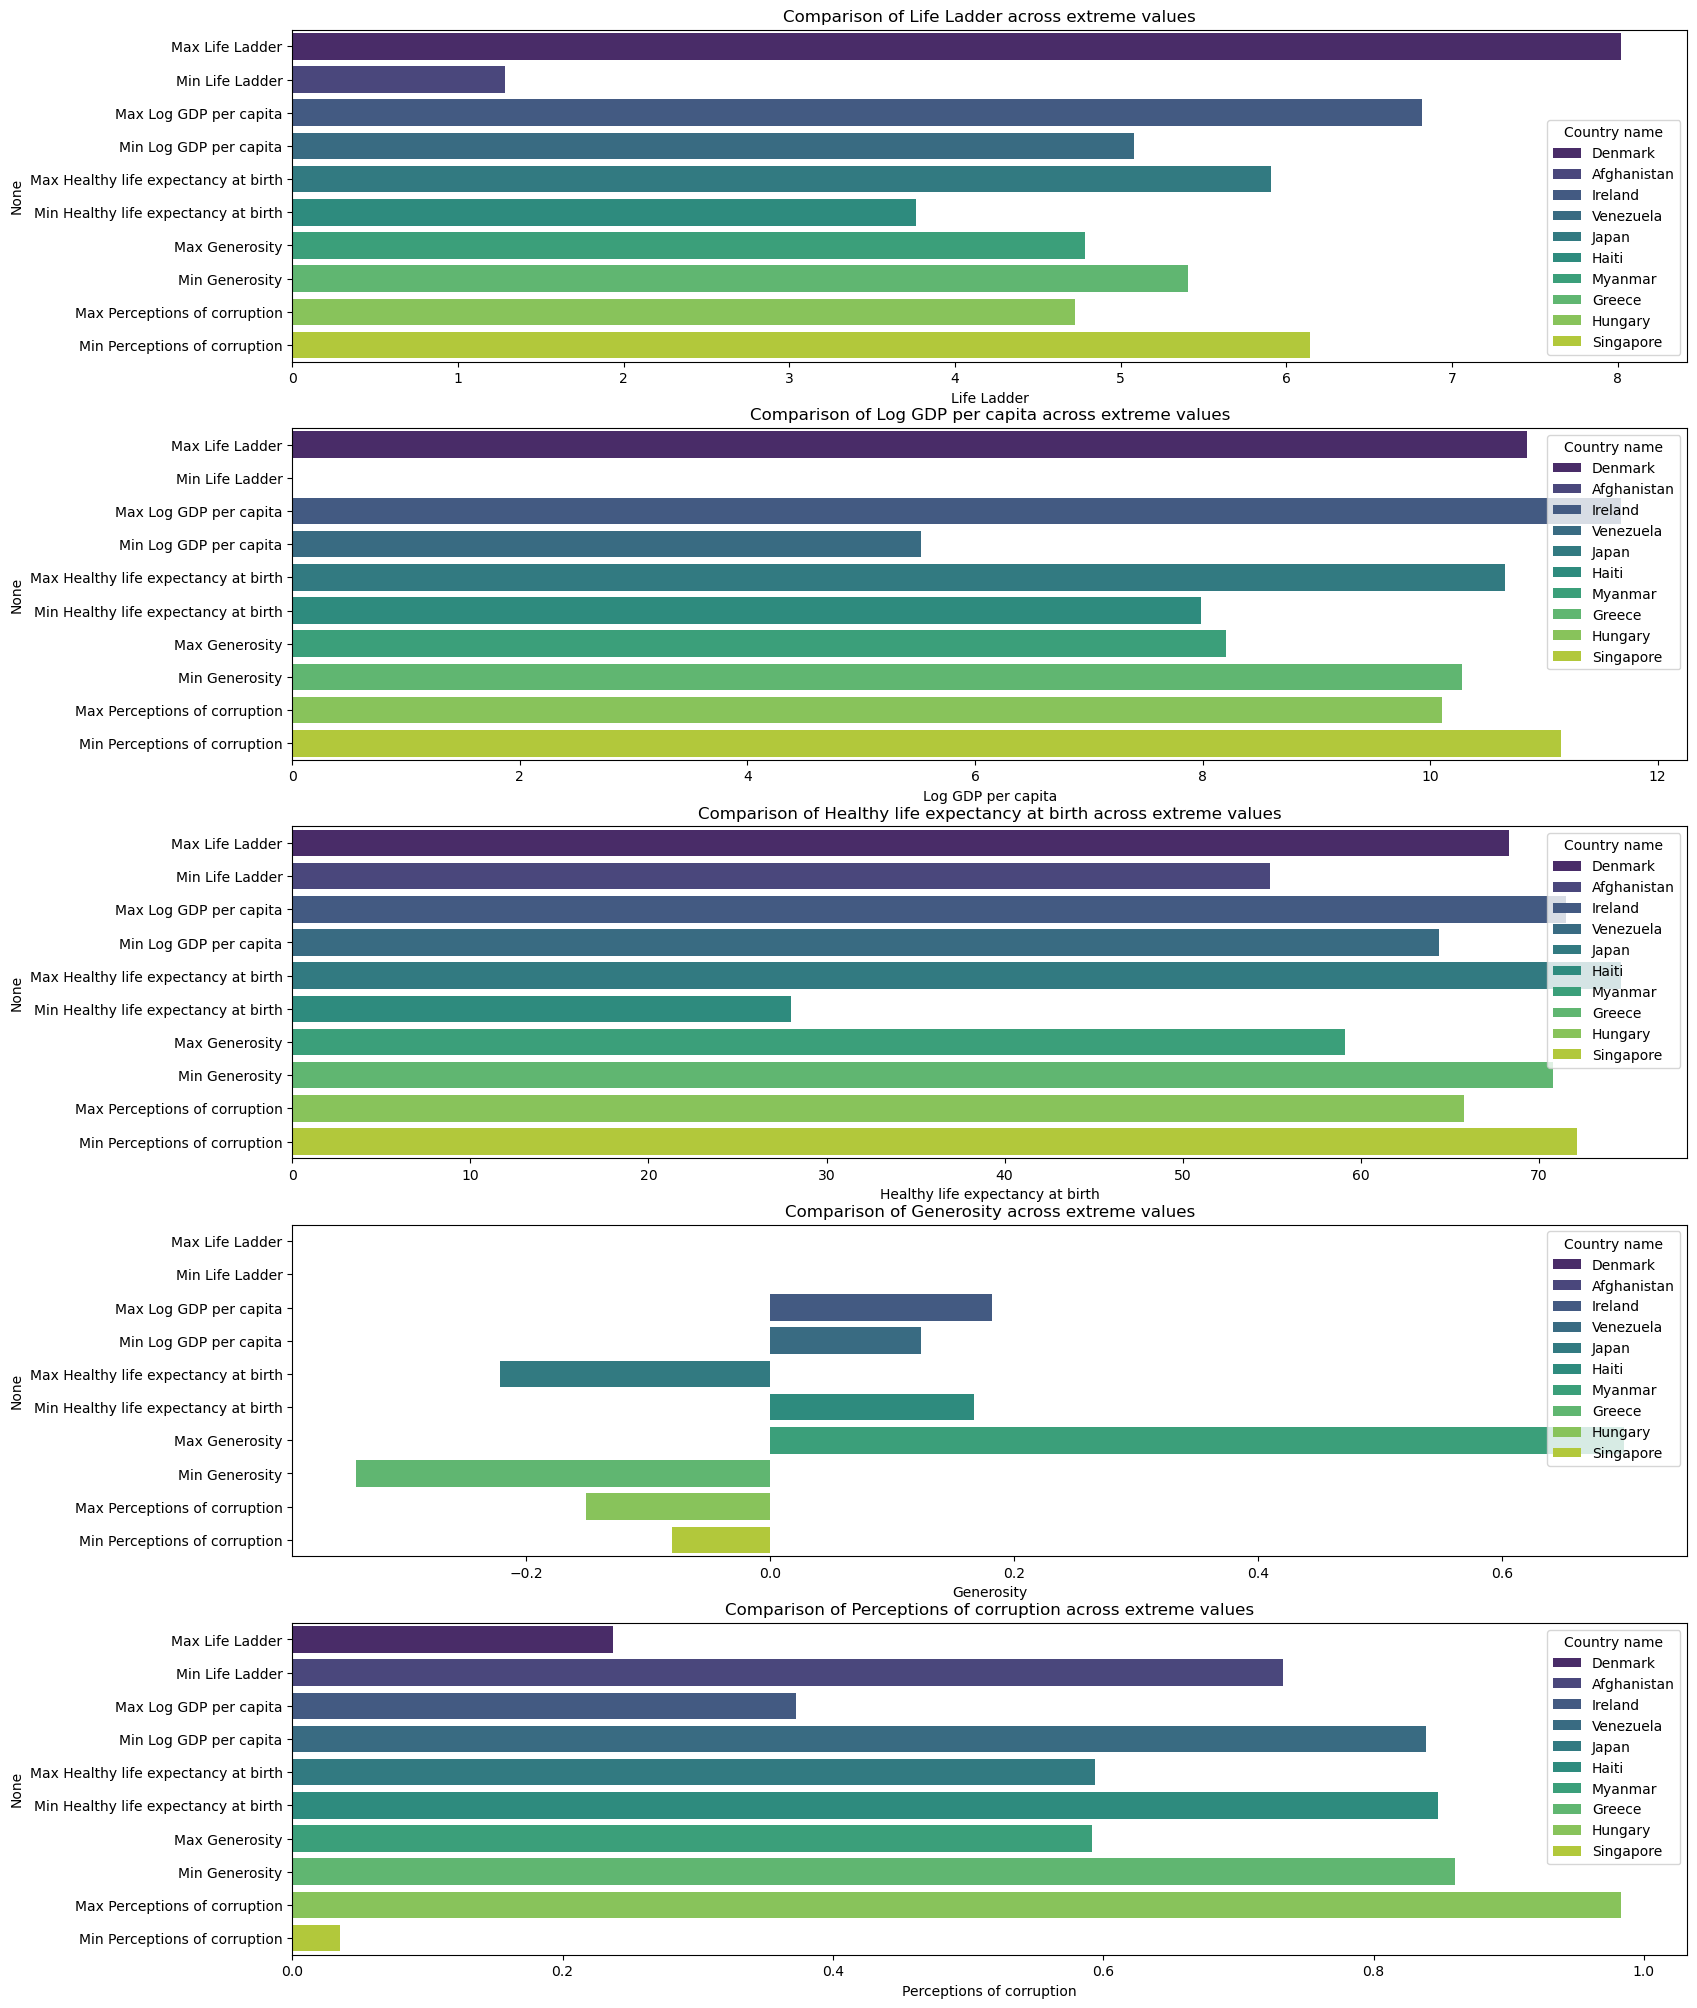

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [20]:
#@title Comparison and Visualization across the Extremes

#creating a subplot to show and compare all plots in one
fig, axes = plt.subplots(nrows=5,ncols=1, figsize=(18,25))

# creating a loop to show all plots for each category in one codeblock
for i, col in enumerate(columns_to_analyze):
  plt.figure(figsize=(14,6))
  sns.barplot(data=extremes_df,
              x=col, y=extremes_df.index,
              hue='Country name',
              palette='viridis', ax=axes[i])
  #setting a title for every plot
  axes[i].set_title(f'Comparison of {col} across extreme values')

plt.tight_layout()
plt.subplots_adjust(hspace=0.8) #changing vertical space to ensure everything is readable
plt.show()

**Observations:**
- Missing value for Country with min Life Ladder → correlation?
- Generosity is Missing for Max and Min Life Ladder
- Highest Life Ladder has also very High GPD and Life expectancy and 2nd lowest corruption
- Max Generosity has quite Low life expectancy compared to others
- Min Genersotiy has quite high values in the other categories → getting money from other countries increases Life Ladder?


# Data Cleaning & Feature Selection

**Overview to all Missing Values (NaN) in the Dataset**

In [21]:
#creating an overview of all NaN's in the dataset
happy_data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

**Creation of a Correlation Matrix**
---
By doing so, we will see which features have the lowest correlation and can be dropped from the data set to reduce dimensionality



In [23]:
#@title Creating the Correlation Matrix

# creating a copy so we don't destroy our data
happy_cleaned_corr = happy_data.copy().drop(columns=['Country name', 'year'])

# dropping unecessary columns (Country name and year)
happy_cleaned_corr

# the final correlation matrix
corr_matrix = happy_cleaned_corr.corr()

corr_matrix

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.783556,0.722738,0.723782,0.538210,0.177398,-0.430485,0.515283,-0.352412
Log GDP per capita,0.783556,1.000000,0.685329,0.832768,0.364816,-0.000766,-0.353893,0.230868,-0.260689
Social support,0.722738,0.685329,1.000000,0.606791,0.404131,0.065240,-0.221410,0.424524,-0.454878
Healthy life expectancy at birth,0.723782,0.832768,0.606791,1.000000,0.371685,0.027471,-0.307819,0.219097,-0.152458
Freedom to make life choices,0.538210,0.364816,0.404131,0.371685,1.000000,0.321396,-0.466023,0.578398,-0.278959
Generosity,0.177398,-0.000766,0.065240,0.027471,0.321396,1.000000,-0.270004,0.300608,-0.071975
Perceptions of corruption,-0.430485,-0.353893,-0.221410,-0.307819,-0.466023,-0.270004,1.000000,-0.274208,0.265555
Positive affect,0.515283,0.230868,0.424524,0.219097,0.578398,0.300608,-0.274208,1.000000,-0.334451
Negative affect,-0.352412,-0.260689,-0.454878,-0.152458,-0.278959,-0.071975,0.265555,-0.334451,1.000000


<Axes: >

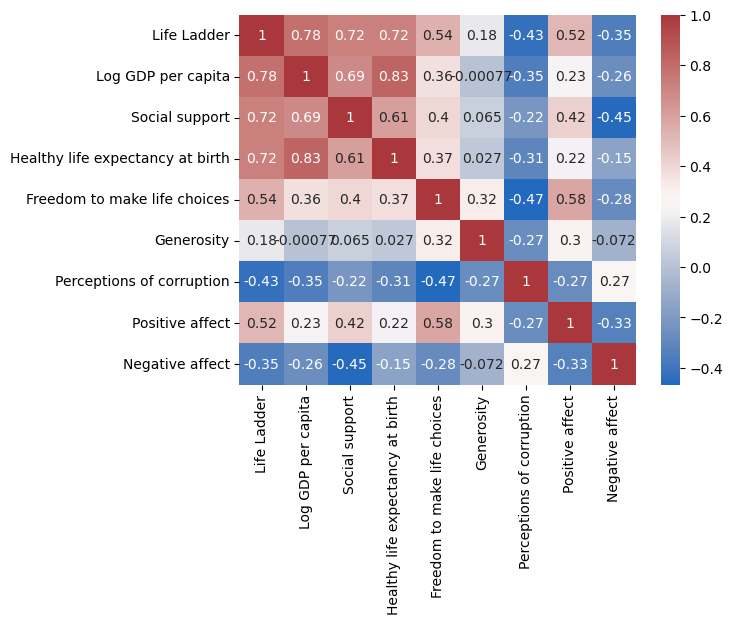

In [24]:
# creating a heatmap to visualize the Correlation

sns.heatmap(data=corr_matrix, annot=True, cmap='vlag')


**Observation:**

The main purpose of this dataset is to predict the Life Ladder this means our main observation should be the Life Ladder row. This shows us that generosity is the one that at least correlates with the life ladder.

There is high correlation with GPD, social support and Life Expectancy.

Surprisingly the positive affect correlates more with the Life Ladder than the Negative affect → almost 0.2 points more
<br><br>
**Conclusion:**

Removing the Generosity column → lowest correlation and least significative <br>
Removing **both** positive and negative affect → both columns show feelings which are already done with the life ladder. The ML model should focus on the facts to predict the 'feeling-value'. Removing both of them to prevent biased predictions

**Removing and Filling the Missing Values**
---

In [25]:
#@title Removing the aforementioned columns  ('Generosity', 'Positive affect', 'Negative affect')

# creating a copy of the dataset to keep to original
happy_cleaned = happy_data.copy().drop(columns=['Generosity', 'Positive affect', 'Negative affect'])

# checking new DataFrame
happy_cleaned

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.882
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.850
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.707
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.731
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.776
...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,0.831
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.789
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,0.757
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,0.753


In [26]:
# getting a new overview of missing values

happy_cleaned.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Perceptions of corruption           125
dtype: int64

**Next Steps**
---

**Challenge:**

The missing values cannot be replaced by mean or median of the whole dataset because it won't fit into the countries other values and corrupt the data for the ML-System
<br><br>
**Plan:**

Creating groups for each country and replace the missing values

- Log GDP, Life Choices → values from previous or next year
- Social Support and Corruption, Life Expectancy → mean of the country

Idea: Creating a new column (contained missing value) for each column?

In [27]:
# @title First Part: Replacing with Values from the previous year of each country

# creating a list of all columns we want to  fill
# and a variable for the column we want to group it and we can use later
cols_to_fill = ['Log GDP per capita','Freedom to make life choices']
grouping_col = 'Country name'

# using a variable to store all groups we want to forward fill and executing it
groups_to_ffill = happy_cleaned.groupby(grouping_col)[cols_to_fill].ffill()

# overwrite the forward filled columns into the happy_cleaned dataframe
happy_cleaned[cols_to_fill] = groups_to_ffill

# check how much values are still missing
print(f'After FFill:')
happy_cleaned.isnull().sum()


After FFill:


Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   10
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices          8
Perceptions of corruption           125
dtype: int64

In [28]:
#@title Second Part: Replacing with values from the next year of each country

# Now we backfill the rest of the data to fill the values whcih are still missing
groups_to_bfill = happy_cleaned.groupby(grouping_col)[cols_to_fill].bfill()

# overwrite the backfilled columns into the happy_cleaned dataframe
happy_cleaned[cols_to_fill] = groups_to_bfill

#checking how much values are missing now
print(f'\nAfter BFill:')
happy_cleaned.isnull().sum()


After BFill:


Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                    9
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices          0
Perceptions of corruption           125
dtype: int64

In [29]:
# @title Third Part: Replacing Values with the mean of each country

# creating a group of values we want to replace with mean

# creating the list of columns
cols_to_mean = ['Healthy life expectancy at birth','Social support', 'Perceptions of corruption']

grouped_means = happy_cleaned.groupby(grouping_col)[cols_to_mean].transform('mean')

happy_cleaned[cols_to_mean] = happy_cleaned[cols_to_mean].fillna(grouped_means)

print('After mean: ')
happy_cleaned.isnull().sum()

After mean: 


Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   9
Social support                       1
Healthy life expectancy at birth    50
Freedom to make life choices         0
Perceptions of corruption           30
dtype: int64

In [30]:
#@title Fourth Part: Replacing the last missing values with the global mean

#calculating the mean for all  numerical values in the DataFrame
global_means = happy_cleaned.mean(numeric_only=True)

#filling all NaN's with the calculated means
happy_cleaned.fillna(global_means, inplace=True)

print('Remaining Missing values:')
happy_cleaned.isnull().sum()

Remaining Missing values:


Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Perceptions of corruption           0
dtype: int64

**Checking for and removing Duplicates**
---

In [31]:
print(f'There are {happy_cleaned.duplicated().sum()} duplicates in the dataset')

There are 0 duplicates in the dataset


# Data Visualization


In [33]:
happy_cleaned.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Perceptions of corruption'],
      dtype='object')

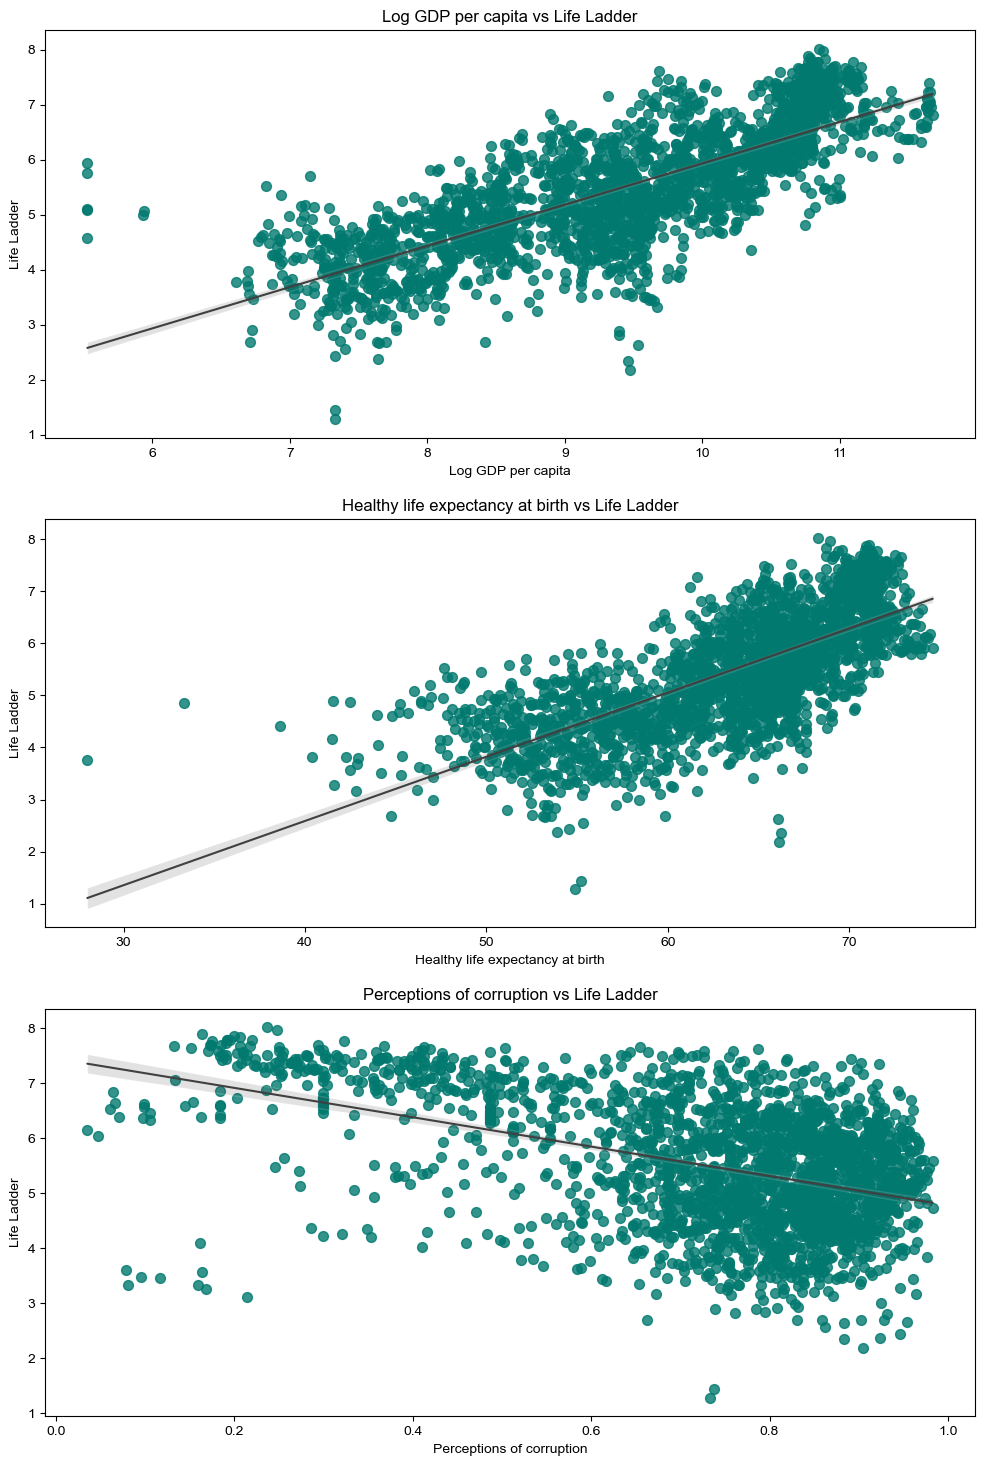

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [32]:
#@title Proofing Correlation between values

#creating a subplot again to keep all plots ordered
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(12,18))

# creating variables for all categories we want to use
cols_for_scatter = ['Log GDP per capita', 'Healthy life expectancy at birth','Perceptions of corruption']
target_col = 'Life Ladder' # needs to be compared with all values above

# setting up the colors and style of the plot
sns.set_style('white')
dot_color = '#01796F'
line_color = '#404040'

#creating a new loop to create new plots
for i, cols in enumerate(cols_for_scatter):
  plt.figure(figsize=(14,6))
  sns.regplot(data=happy_cleaned,
              x=cols, y=target_col,
              scatter_kws={'color': dot_color, 's':50},
              line_kws = {'color': line_color, 'linewidth':1.5, 'linestyle': '-'},
              ax=axes[i])
  axes[i].set_title(f'{cols} vs {target_col}')

# output
plt.tight_layout()
plt.show()

**Creation of a World-Map for to visualize the mean Happiness Score of all Countries**
---

In [34]:
#@title First Step: Preparation of the Data

#create a small dataset with only one column to prepare the map
mean_life_ladder = happy_cleaned.groupby('Country name')['Life Ladder'].mean()

# ressetting the index so plotly can use the Country name as column
map_data = mean_life_ladder.rename_axis('Country name').reset_index()

#checking ig erverything looks fine
map_data.head()



,Country name,Life Ladder
0,Afghanistan,3.219933
1,Albania,5.072750
2,Algeria,5.392000
3,Angola,4.420250
4,Argentina,6.289667


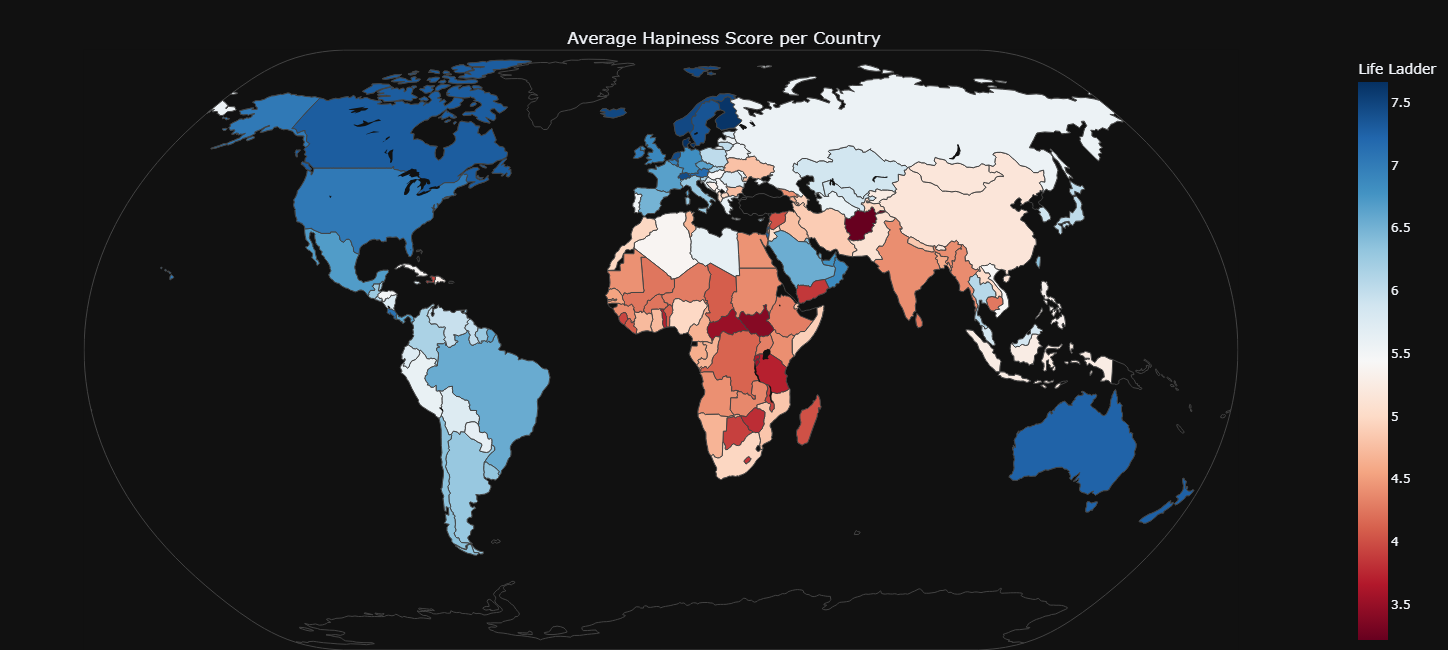

In [37]:
#@title Second Step: Creating the map

#importing rhe library
import plotly.express as px

happiness_map = px.choropleth(data_frame = map_data,
                              locations = 'Country name',
                              locationmode ='country names',
                              color='Life Ladder',
                              color_continuous_scale="RdBu",
                              title = 'Average Happiness Sore per Country',
                              scope='world')

happiness_map.update_layout(template='plotly_dark',
                            width=1200, height=650,
                            title= {'text': 'Average Hapiness Score per Country',
                                    'y':0.95, 'x':0.5,
                                    'xanchor':'center', 'yanchor':'top'
                                    },
                            margin={"r":0,"t":50,"l":0,"b":0})

happiness_map.update_geos(projection_type='natural earth')

happiness_map.show()

happiness_map.write_html("world_happiness_choropleth.html")